In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('spreadspoke_scores.csv')

df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,01/12/2020,2019,Division,True,Green Bay Packers,28,23,Seattle Seahawks,GB,-4.5,45.5,Lambeau Field,False,NaN,NaN,NaN,NaN
12674,01/12/2020,2019,Division,True,Kansas City Chiefs,51,31,Houston Texans,KC,-10.0,50.5,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12675,01/19/2020,2019,Conference,True,Kansas City Chiefs,35,24,Tennessee Titans,KC,-7.0,51,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12676,01/19/2020,2019,Conference,True,San Francisco 49ers,37,20,Green Bay Packers,SF,-8.0,46.5,Levi's Stadium,False,NaN,NaN,NaN,NaN


In [3]:
# Dropping the weather_detail column since it has many NaN values and isn't needed.

df = df.drop(columns=['weather_detail'])
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,01/12/2020,2019,Division,True,Green Bay Packers,28,23,Seattle Seahawks,GB,-4.5,45.5,Lambeau Field,False,NaN,NaN,NaN
12674,01/12/2020,2019,Division,True,Kansas City Chiefs,51,31,Houston Texans,KC,-10.0,50.5,Arrowhead Stadium,False,NaN,NaN,NaN
12675,01/19/2020,2019,Conference,True,Kansas City Chiefs,35,24,Tennessee Titans,KC,-7.0,51,Arrowhead Stadium,False,NaN,NaN,NaN
12676,01/19/2020,2019,Conference,True,San Francisco 49ers,37,20,Green Bay Packers,SF,-8.0,46.5,Levi's Stadium,False,NaN,NaN,NaN


In [4]:
# Locating the values of Superbowl in the schedule_week column.

Superbowl_df = df.loc[df['schedule_week'] == 'Superbowl' ]

Superbowl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40
1294,01/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53
1483,01/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81
1672,01/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72
1861,01/18/1976,1975,Superbowl,True,Dallas Cowboys,17,21,Pittsburgh Steelers,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44


In [5]:
#ht stands for home team.
# Changed column team_home to home_appearences. 

ht = Superbowl_df['team_home'].value_counts()

ht_df = pd.DataFrame(ht)

ht_df['team_name'] = ht_df.index

ht_df = ht_df.reset_index(drop=True)

ht_df = ht_df.rename(columns={'team_home': 'home_appearences'})

ht_df

,home_appearences,team_name
0,7,Dallas Cowboys
1,6,San Francisco 49ers
2,5,New England Patriots
3,5,Green Bay Packers
4,4,Denver Broncos
5,3,Miami Dolphins
6,2,Minnesota Vikings
7,2,Baltimore Colts
8,2,Washington Redskins
9,2,Oakland Raiders


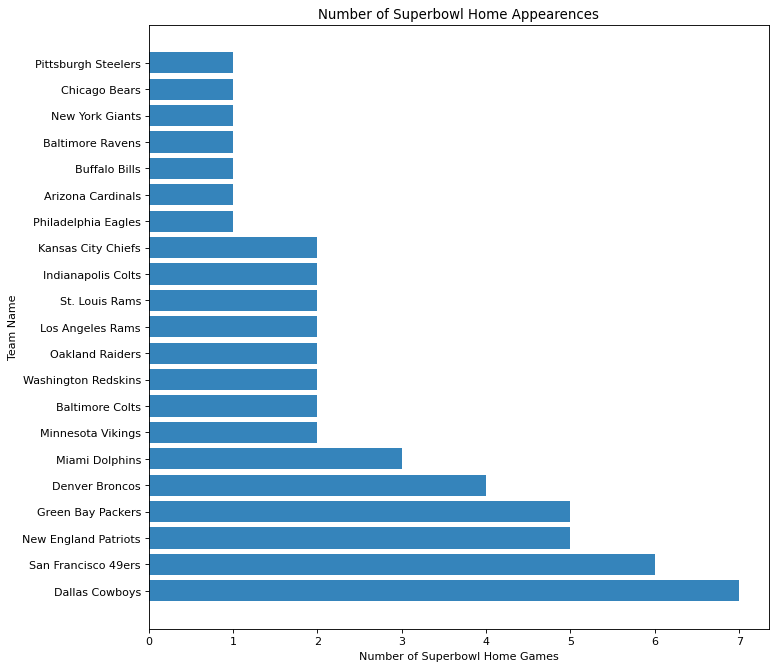

In [6]:
#Bar chart shows number of games each team was home for the Super Bowl.

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

objects = ht_df['team_name']
y_pos = np.arange(len(objects))
performance = ht_df['home_appearences']

plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Superbowl Home Games')
plt.ylabel('Team Name')
plt.title('Number of Superbowl Home Appearences')


plt.show()

In [7]:
# at stands for away team.


at = Superbowl_df['team_away'].value_counts()

at_df = pd.DataFrame(at)

at_df['team_name'] = at_df.index

at_df = at_df.reset_index(drop=True)

at_df = at_df.rename(columns={'team_away': 'away_appearences'})

at_df


,away_appearences,team_name
0,7,Pittsburgh Steelers
1,5,New England Patriots
2,4,New York Giants
3,4,Denver Broncos
4,3,Washington Redskins
5,3,Seattle Seahawks
6,3,Buffalo Bills
7,2,Philadelphia Eagles
8,2,Minnesota Vikings
9,2,Miami Dolphins


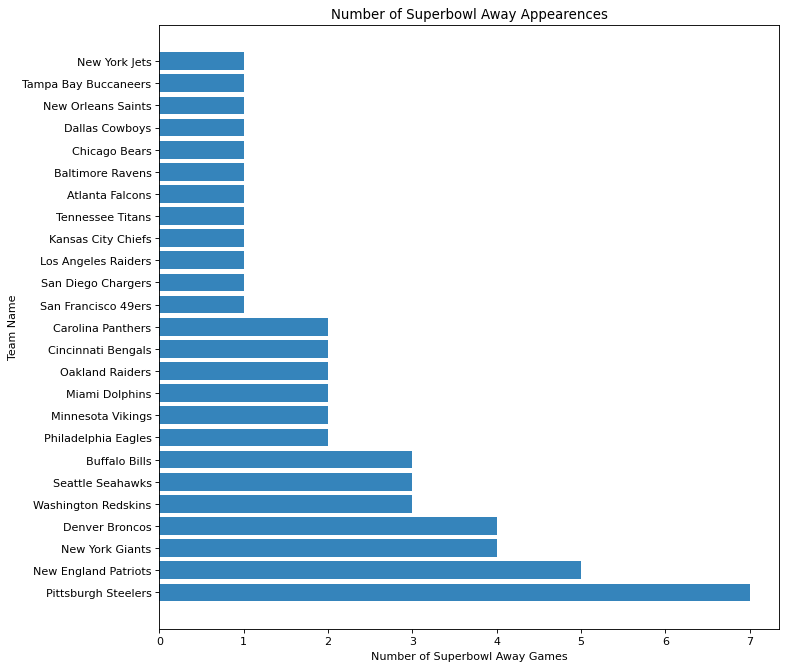

In [8]:
# Bar chart shows number of times each team was away for the Super Bowl.

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

objects = at_df['team_name']
y_pos = np.arange(len(objects))
performance = at_df['away_appearences']

plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Superbowl Away Games')
plt.ylabel('Team Name')
plt.title('Number of Superbowl Away Appearences')

plt.show()

In [9]:
# Weather temperature average for superbowl games in degrees Fahrenheit.

wt = Superbowl_df['weather_temperature'].mean()

wt

65.61290322580645

In [10]:
# Wind speed average for superbowl games in mph.

ws = Superbowl_df['weather_wind_mph'].mean()

ws

5.258064516129032

In [19]:
#Average score of superbowls played by home teams = 25 points.

sh = Superbowl_df['score_home'].mean()

int(sh)

25

In [20]:
#Average score of superbowls played by away teams = 20 points.

sa = Superbowl_df['score_away'].mean()

int(sa)

20

In [13]:
#Created a new column called winner with a condition that will show if the team that won the SuperBowl was home or away. 

Superbowl_df['winner'] = np.where(Superbowl_df['score_home']>Superbowl_df['score_away'], 
                                           'home', 'away')
Superbowl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,winner
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90,home
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,home
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,away
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,home
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,home
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40,home
1294,01/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53,home
1483,01/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81,home
1672,01/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72,away
1861,01/18/1976,1975,Superbowl,True,Dallas Cowboys,17,21,Pittsburgh Steelers,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44,away


In [14]:
# Created a new column called winning_team.
# New condition shows the winning_team name for each value in the rows relating to the winner row values.  

Superbowl_df['winning_team'] = np.where(Superbowl_df['winner']=="home", 
                                           Superbowl_df['team_home'] , Superbowl_df['team_away'] )
Superbowl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,winner,winning_team
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90,home,Green Bay Packers
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,home,Green Bay Packers
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,away,New York Jets
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,home,Kansas City Chiefs
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,home,Baltimore Colts
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40,home,Dallas Cowboys
1294,01/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53,home,Miami Dolphins
1483,01/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81,home,Miami Dolphins
1672,01/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72,away,Pittsburgh Steelers
1861,01/18/1976,1975,Superbowl,True,Dallas Cowboys,17,21,Pittsburgh Steelers,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44,away,Pittsburgh Steelers


In [15]:
# no_of_wins stands for number of wins.

no_of_wins = Superbowl_df["winning_team"].value_counts()

no_of_wins = pd.DataFrame(no_of_wins)

no_of_wins['Team_names'] = no_of_wins.index

no_of_wins = no_of_wins.reset_index(drop=True)

no_of_wins

,winning_team,Team_names
0,6,Pittsburgh Steelers
1,5,New England Patriots
2,5,Dallas Cowboys
3,5,San Francisco 49ers
4,4,New York Giants
5,4,Green Bay Packers
6,3,Denver Broncos
7,3,Washington Redskins
8,2,Miami Dolphins
9,2,Kansas City Chiefs


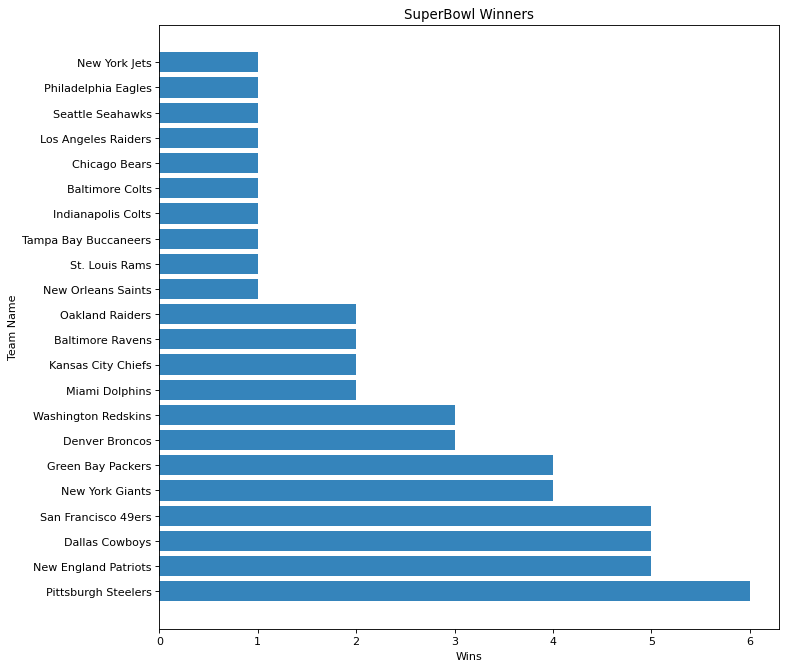

In [16]:
# Bar chart shows total SuperBowl wins for NFL teams. 

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

objects = no_of_wins['Team_names']
y_pos = np.arange(len(objects))
performance = no_of_wins["winning_team"]

plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Wins')
plt.ylabel('Team Name')
plt.title('SuperBowl Winners')

plt.show()

## Home team wins vs. Away team wins

In [17]:
# Counting the total amount of home team and away team SuperBowl wins. 

no_of_winners = Superbowl_df["winner"].value_counts() 

no_of_winners


home    31
away    22
Name: winner, dtype: int64

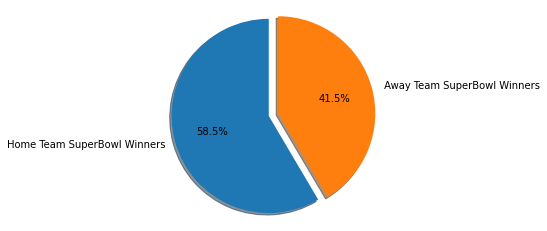

In [18]:
# Displaying a pie chart for an easy to read visual on the percentage rates of Home vs. Away team SuperBowl winners.  

labels = 'Home Team SuperBowl Winners', ' Away Team SuperBowl Winners'
sizes = [31, 22]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Pie chart shows home teams have won 17% more SuperBowl games then away teams!
# Home team has a slight advantage historically.